In [2]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

avivo_data = pd.read_excel(r'/Users/mbenkhal/Documents/Avivo/Updated/master.xlsx')
avivo_data['Status'] = "0"
avivo_data.shape

(828, 121)

In [3]:
list(avivo_data.columns.values)

['Form Date',
 'Program_admission',
 'Staff_admission',
 'Client Number',
 'Age_admission',
 'Age of first use (Primary)',
 'Age of first use (Secondary)',
 'Age of first use (Tertiary)',
 'Are any children living with someone else due to CPS court order or other action',
 'CHSR Dimension 1',
 'CHSR Dimension 2',
 'CHSR Dimension 3',
 'CHSR Dimension 4',
 'CHSR Dimension 5',
 'CHSR Dimension 6',
 'Client currently involved with CPS',
 'Current CD Treatment',
 'Current labor status',
 'Current marital status',
 'Currently enrolled in school or job training program',
 'Currently smoke cigarettes',
 'Currently under the jurisdiction of the court or on probation/parole of',
 'Did drug court refer?',
 'Does client have children',
 'Does this involvement result from',
 "Driver's license revoked due to DWI",
 'Education',
 'For how many children has the client lost parental rights',
 'Hispanic Ethnicity',
 'History of injection drug use',
 'How many children',
 'How many of the children are l

In [7]:
avivo_data.columns.get_loc("Reason.for.Discharge")

90

In [9]:
for index, row in avivo_data.iterrows():
    if(row[90] == "Completed program" or row[90] == "Transferred to other program"):
        
        avivo_data.loc[index,'Status'] = "1"


In [10]:
avivo_data.columns.get_loc("Program_discharge")

71

In [13]:
for index , row in avivo_data.iterrows():
    if(row[1] == "Treatment - Relapse Men"):
        avivo_data.loc[index ,'Expected Hours'] = '150'
    elif(row[1] == "Treatment - Family - Outpatient"):
        avivo_data.loc[index ,'Expected Hours'] = '250'
    elif(row[1] == "Treatment - IDD Women"):
        avivo_data.loc[index ,'Expected Hours'] = '200'
    elif(row[1] == "Treatment - IDD Men"):
        avivo_data.loc[index ,'Expected Hours'] = '200'
    else:
        avivo_data.loc[index ,'Expected Hours'] = '150'
avivo_data.head(5)

,Form Date,Program_admission,Staff_admission,Client Number,Age_admission,Age of first use (Primary),Age of first use (Secondary),Age of first use (Tertiary),Are any children living with someone else due to CPS court order or other action,CHSR Dimension 1,...,Code,start_service_data,end_service_data,data_birth,gender,race,number_hours,year,Status,Expected Hours
0,2014-12-05,Treatment - Family - Outpatient,"Stewart, Lorene",111156598,NaN,13.0,19,13,Not applicable - No children/no child protect ...,Minor problem,...,H2035 HH HQ U60945: IOP Family - IDD w/kids - ...,2014-12-03,2014-12-30,1979-07-03,Female,White,47.0,2014,0,250
1,2014-11-10,Treatment - IDD Men,"Salsness, Carrie",111156572,NaN,9.0,9,0,Not applicable - No children/no child protect ...,No problem,...,H2035 HH0944: IDD - Individual - Drug,2014-11-06,2014-12-17,1988-02-19,Male,Black or African American,87.0,2014,0,200
2,2014-11-14,Treatment - Relapse Men,"Salsness, Carrie",111156525,NaN,16.0,0,0,Not applicable - No children/no child protect ...,No problem,...,H2035 HQ0945: Relapse - Group - Alcohol,2014-11-14,2014-12-26,1991-05-07,Male,White,78.0,2014,0,150
3,2014-11-20,Treatment - IDD Women,"Salsness, Carrie",111156512,NaN,24.0,17,17,Yes,No problem,...,H2035 HH HQ0944: IDD - Group - Drug,2014-11-19,2014-12-11,1978-10-09,Female,White,35.0,2014,0,200
4,2015-01-29,Treatment - IDD Women,"Stewart, Lorene",111157248,NaN,14.0,14,35,Not applicable - No children/no child protect ...,No problem,...,H2035 HH0945: IDD - Individual - Alcohol,2015-01-28,2015-05-01,1968-10-25,Female,Black or African American,221.0,2015,1,200


In [14]:
sum_hours_program = avivo_data.groupby(['Program','Status']).sum()

sum_hours_program['number_hours'].head(5)


Program                          Status
Treatment - Family - Outpatient  0          2462.0
                                 1          3894.0
Treatment - IDD Men              0         13961.0
                                 1         18720.5
Treatment - IDD Women            0         10679.0
Name: number_hours, dtype: float64

In [15]:
count = avivo_data.groupby(['Program','Status']).count()
count['Client_number'].head(5)


Program                          Status
Treatment - Family - Outpatient  0          36
                                 1          19
Treatment - IDD Men              0         221
                                 1         121
Treatment - IDD Women            0         187
Name: Client_number, dtype: int64

In [16]:
df = pd.DataFrame(columns= ["Program","Status","Avg_hours","Expected_Hours"])
df['Avg_hours']= sum_hours_program['number_hours']/count['Client_number']

names = list(df.index)
names

[('Treatment - Family - Outpatient', '0'),
 ('Treatment - Family - Outpatient', '1'),
 ('Treatment - IDD Men', '0'),
 ('Treatment - IDD Men', '1'),
 ('Treatment - IDD Women', '0'),
 ('Treatment - IDD Women', '1'),
 ('Treatment - Relapse Men', '0'),
 ('Treatment - Relapse Men', '1'),
 ('Treatment - Relapse Women', '0'),
 ('Treatment - Relapse Women', '1')]

In [17]:
for i in range(0, df.shape[0]):
    temp = ' '.join(names[i])
    if("Treatment - Relapse Men" in temp):
        df.loc[names[i],'Expected_Hours'] = '150'
        df.loc[names[i],'Program'] = "Treatment - Relapse Men"
        if("true" in temp):
            print(temp)
            df.loc[names[i],'Status'] = 'completed'
        elif("false" in temp):
            print("not"+ temp)
            df.loc[names[i],'Status'] = 'not completed'
            
    elif("Treatment - Family - Outpatient" in temp):
        df.loc[names[i],'Expected_Hours'] = '250'
        df.loc[names[i],'Program'] = "Treatment - Family - Outpatient"
        if("true" in temp):
            df.loc[names[i],'Status'] = 'completed'
        elif("false" in temp):
            df.loc[names[i],'Status'] = ' not completed' 
    elif("Treatment - IDD Women" in temp):
        df.loc[names[i],'Expected_Hours'] = '200'
        df.loc[names[i],'Program'] = "Treatment - IDD Women"
        if("true" in temp):
            df.loc[names[i],'Status'] = 'completed'
        elif("false" in temp):
            df.loc[names[i],'Status'] = ' not completed' 
    elif("Treatment - IDD Men" in temp):
        df.loc[names[i],'Expected_Hours'] = '200'
        df.loc[names[i],'Program'] = "Treatment - IDD Men"
        if("true" in temp):
            df.loc[names[i],'Status'] = 'completed'
        elif("false" in temp):
            df.loc[names[i],'Status'] = ' not completed' 
    else:
        df.loc[names[i],'Expected_Hours'] = '150'
        df.loc[names[i],'Program'] = "Treatment - Relapse Women"
        if("true" in temp):
            df.loc[names[i],'Status'] = 'completed'
        elif("false" in temp):
            df.loc[names[i],'Status'] = 'not completed' 
df

Program  \
Program                         Status                                    
Treatment - Family - Outpatient 0       Treatment - Family - Outpatient   
                                1       Treatment - Family - Outpatient   
Treatment - IDD Men             0                   Treatment - IDD Men   
                                1                   Treatment - IDD Men   
Treatment - IDD Women           0                 Treatment - IDD Women   
                                1                 Treatment - IDD Women   
Treatment - Relapse Men         0               Treatment - Relapse Men   
                                1               Treatment - Relapse Men   
Treatment - Relapse Women       0             Treatment - Relapse Women   
                                1             Treatment - Relapse Women   

                                       Status   Avg_hours Expected_Hours  
Program                         Status                                    
Treatment - Family - Outpatient 0         NaN   68.388889            250  
                                1         NaN  204.947368            250  
Treatment - IDD Men             0         NaN   63.171946            200  
                                1         NaN  154.714876            200  
Treatment - IDD Women           0         NaN   57.106952            200  
                                1         NaN  161.802632            200  
Treatment - Relapse Men         0         NaN   63.206667            150  
                                1         NaN  153.501702            150  
Treatment - Relapse Women       0         NaN   46.750000            150  
                                1         NaN  175.800000            150

In [18]:
type(df["Expected_Hours"])
df['Percentage_from_expected_hours']= (df['Avg_hours']/df["Expected_Hours"].astype('int32'))*100


In [20]:
avivo_data.to_excel(r'/Users/mbenkhal/Documents/Avivo/MergedData_completed.xlsx')

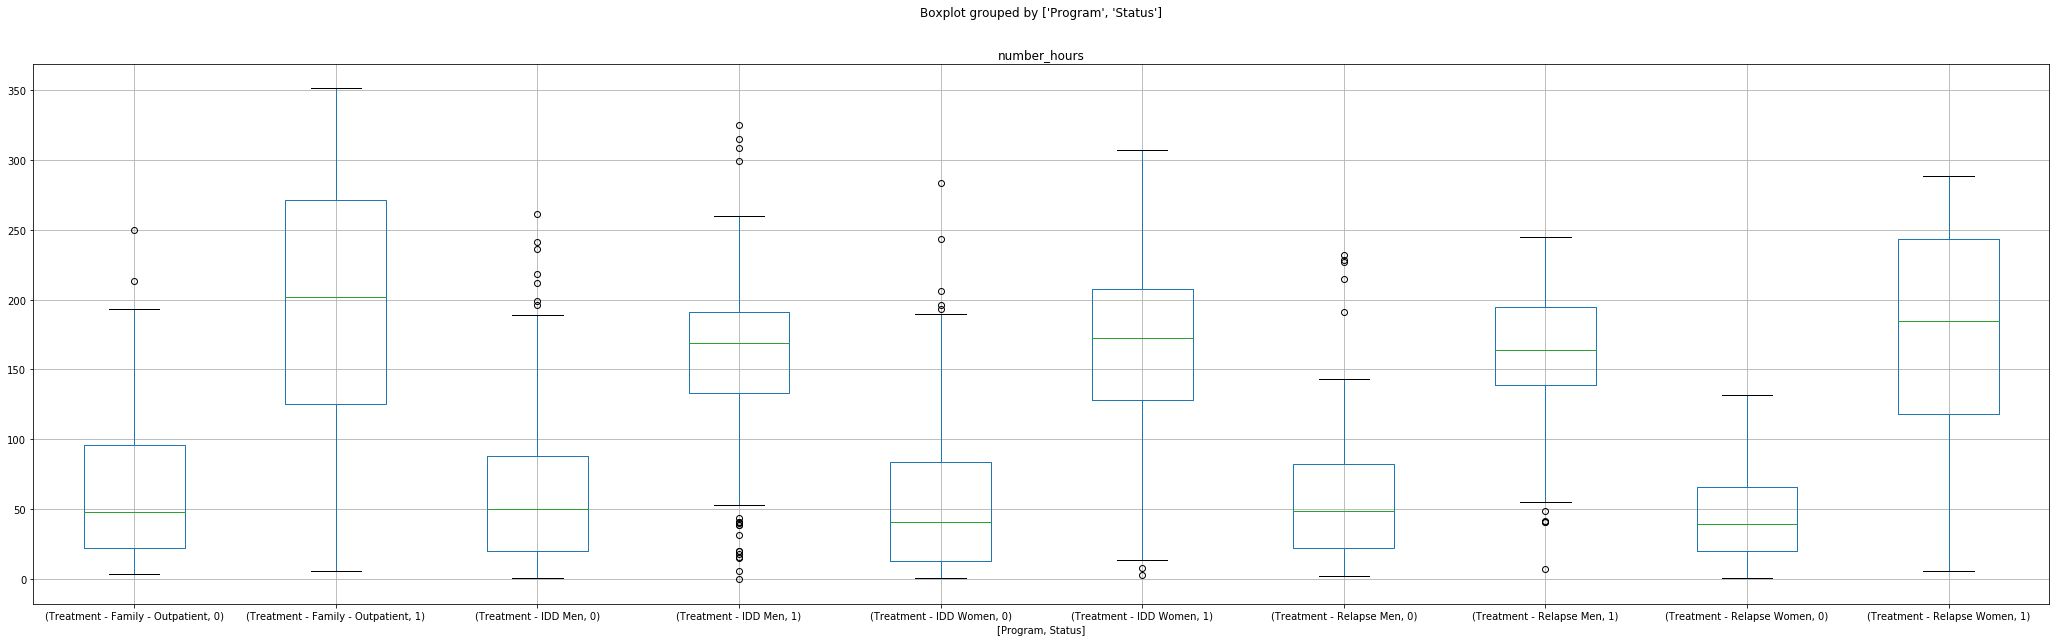

In [21]:
avivo_data.boxplot(column=['number_hours'], by=['Program','Status'],figsize=(35,10))

In [24]:
avivo_data.columns.get_loc("DSM.CD.Diagnosis")

85

In [25]:
df_diagnosis = avivo_data[['DSM.CD.Diagnosis','Status']]

In [26]:
df_diagnosis = pd.concat([pd.get_dummies(df_diagnosis, columns=['DSM.CD.Diagnosis'],drop_first=True)], axis =1)
df_diagnosis.sample(5)

,Status,DSM.CD.Diagnosis_Alcohol Use Disorder Mild,DSM.CD.Diagnosis_Alcohol Use Disorder Moderate/Severe,DSM.CD.Diagnosis_Cannabis (marijuana) dependence,DSM.CD.Diagnosis_Cannabis Use Disorder Mild,DSM.CD.Diagnosis_Cannabis Use Disorder Moderate/Severe,DSM.CD.Diagnosis_Cocaine or crack dependence,DSM.CD.Diagnosis_Hallucinogen Use Disorder Moderate/Severe,"DSM.CD.Diagnosis_Heroin, methadone, other opiate/synthetic abuse","DSM.CD.Diagnosis_Heroin, methadone, other opiate/synthetic dependence",...,"DSM.CD.Diagnosis_Methamphetamine, other amphetamine dependence",DSM.CD.Diagnosis_Opioid Use Disorder Mild,DSM.CD.Diagnosis_Opioid Use Disorder Moderate/Severe,DSM.CD.Diagnosis_Other Substance Use Disorder Moderate/Severe,DSM.CD.Diagnosis_Sedative/Hypnotic/Anxiolytic Use Disorder Mild,DSM.CD.Diagnosis_Sedative/Hypnotic/Anxiolytic Use Disorder Moderate/Severe,DSM.CD.Diagnosis_Stimulant Related Disorder (Amphetamine/Other Stimulants) Mild,DSM.CD.Diagnosis_Stimulant Related Disorder (Amphetamine/Other Stimulants) Moderate/Severe,DSM.CD.Diagnosis_Stimulant Related Disorder (Cocaine) Mild,DSM.CD.Diagnosis_Stimulant Related Disorder (Cocaine) Moderate/Severe
230,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
279,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_diagnosis['Status'] = pd.to_numeric(df_diagnosis['Status'])

In [29]:
import statsmodels.api as sm
import seaborn as sns
import numpy as np

cols = df_diagnosis.columns[1:]
model = sm.Logit(df_diagnosis['Status'].astype(int),df_diagnosis[cols])
result = model.fit()
print(result.summary2())

         Current function value: 0.635635
         Iterations: 35
                                                                        Results: Logit
Model:                                               Logit                                           Pseudo R-squared:                                0.026    
Dependent Variable:                                  Status                                          AIC:                                             1094.6120
Date:                                                2018-04-11 17:02                                BIC:                                             1193.7113
No. Observations:                                    828                                             Log-Likelihood:                                  -526.31  
Df Model:                                            20                                              LL-Null:                                         -540.41  
Df Residuals:                                  

/Users/mbenkhal/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
